## KMeans Image Segmentation

This code reads an image and treats pixel as three element feature vector of unsupervised data. It performs KMeans clustering of the pixels and then re-colours the image using the median of each colour component within the clusters.

In [1]:
# The usual loading of modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
from sklearn import cluster
from scipy import misc
from numpy import zeros

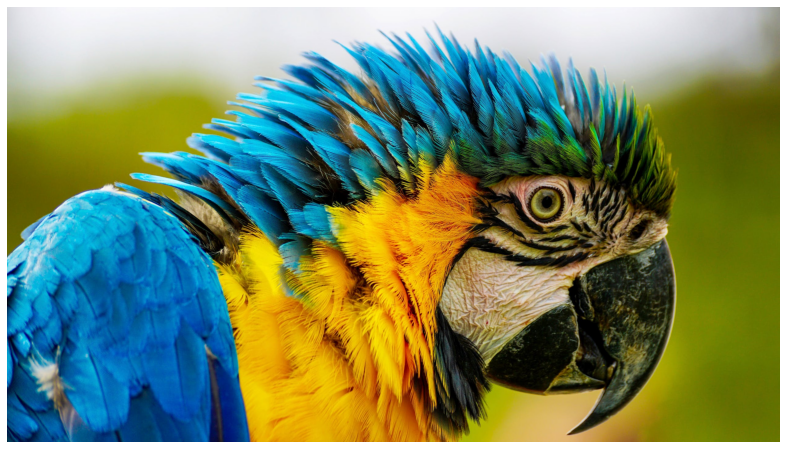

In [2]:
# Load an image.
imagex = image.imread("parrot.jpeg") # You may want to test with a smaller image, it will be faster
plt.figure(figsize = (15,8))
plt.axis("off") # An axis free plot
plt.imshow(imagex) # Display the image
x, y, z = imagex.shape # Get the dimensions of the image (z is the number of colour bytes)
image_2d = imagex.reshape(x*y, z) # Turn the 2D pixels into 1D pixels
image_2dr = zeros([x*y,z]) # and create an output array for the re-coloured image. 

In [3]:
# THIS IS THE PART YOU ARE TO REPLACE
cluster_count = 5 # How many clusters we want
kmeans_cluster = cluster.KMeans(n_clusters=cluster_count) # Create a clusterer
kmeans_cluster.fit(image_2d) # Apply it to the data
cluster_labels = kmeans_cluster.labels_ # Cluster membership for each pixel

In [4]:
print(cluster_labels)

[3 3 3 ... 2 2 2]


In [5]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc'))
cluster_2d['d'] = cluster_labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):   
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print(m) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a):
            image_2dr[i] = m[0:3]

[  3. 121. 180.   0.]
[213. 164.   5.   1.]
[105. 111.   2.   2.]
[219. 222. 228.   3.]
[16. 29. 14.  4.]


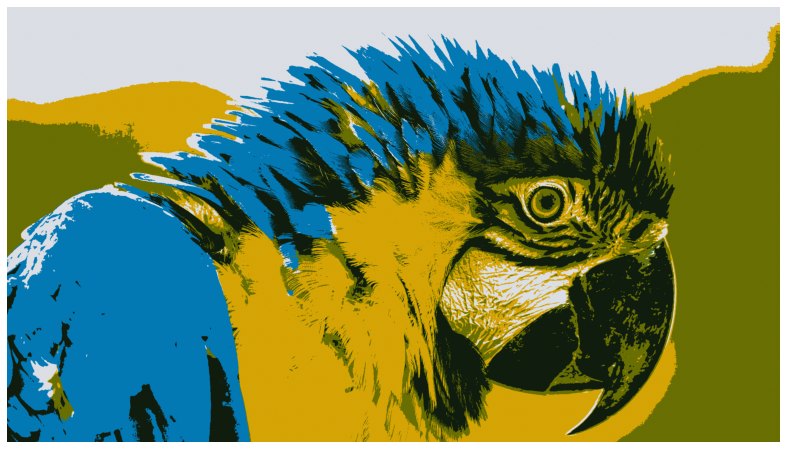

In [6]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(image_out)

# Use the following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')

In [7]:
import numpy as np
from scipy.spatial.distance import cdist

def kmeans(data, n_clusters=10, n_iterations=500, verbose=False):
    
    centres = data[np.random.choice(len(data), n_clusters), :]
    if verbose:
        print('centres generated')
    
    dist = cdist(data, centres)
        
    labels = np.array([np.argmin(i) for i in dist])
    if verbose:
        print('initial labels found')
    
    for i in range(n_iterations):
        
        if verbose:
            print('iteration: ', i+1, '/', n_iterations)
            
        centres = []
        
        for j in range(n_clusters):
            
            data_idx = []
            
            for x, val in enumerate(labels):
                if val == j:
                    data_idx.append(x)
                    
            tmp_c = data[data_idx].mean(axis=0)
            centres.append(tmp_c)
            
        centres = np.vstack(centres)
        if verbose:
            print('centres updated')
            
        dist = cdist(data, centres)
        
        labels = np.array([np.argmin(l) for l in dist])
        if verbose:
            print('labels found')
        
    return labels

In [9]:
count = 5
iterations = 10

labels = kmeans(image_2d, n_clusters=count, n_iterations=iterations, verbose=True)

print(labels)

centres generated
initial labels found
iteration:  1 / 10
centres updated
labels found
iteration:  2 / 10
centres updated
labels found
iteration:  3 / 10
centres updated
labels found
iteration:  4 / 10
centres updated
labels found
iteration:  5 / 10
centres updated
labels found
iteration:  6 / 10
centres updated
labels found
iteration:  7 / 10
centres updated
labels found
iteration:  8 / 10
centres updated
labels found
iteration:  9 / 10
centres updated
labels found
iteration:  10 / 10
centres updated
labels found
[3 3 3 ... 0 0 0]


[105. 111.   2.   0.]
[17. 29. 14.  1.]
[  3. 121. 180.   2.]
[219. 222. 228.   3.]
[213. 165.   5.   4.]


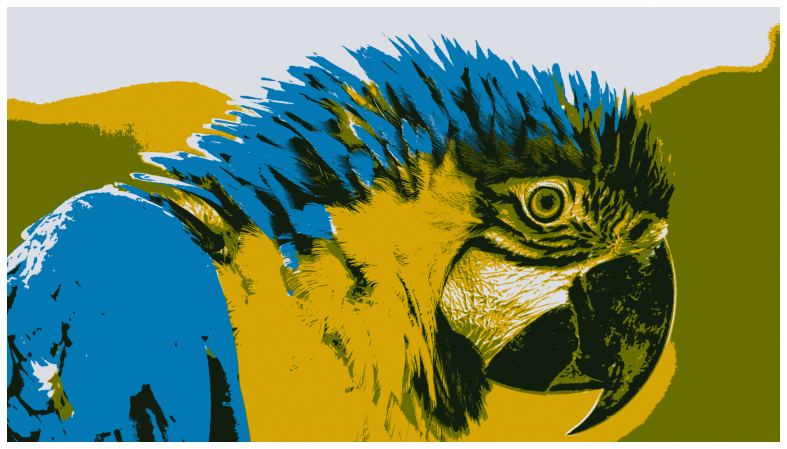

In [10]:
i_2dr = zeros([x*y,z])

# Turn the clustered data into a DataFrame and add the class as a fourth column
c_2d = pd.DataFrame(image_2d, columns=list('abc'))
c_2d['d'] = labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,count):   
    subset = c_2d.loc[c_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m1 = subset.median().values # and calcuate the median of each colour channel
    print(m1) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(labels)):
        if (labels[i] == a):
            i_2dr[i] = m1[0:3]
            
# Display the results
i_out = i_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(i_out)

plt.savefig('clustered_out_coded.png', bbox_inches='tight')